#Linear Regression

Linear regression based on closed-form solution.

Creating example dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.random.rand(200, 1)
y = 10 - 2*X+np.random.rand(200, 1)

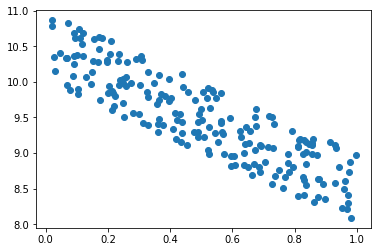

In [4]:
plt.scatter(X, y)
plt.show()

Creating linear regression model with equation.

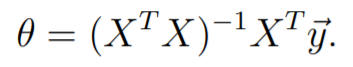

In [5]:
X_n = np.c_[np.ones((200, 1)), X]
theta = np.linalg.inv(X_n.T @ X_n) @ X_n.T @ y
print(theta)

[[10.50034325]
 [-2.02155035]]


Predictions

In [6]:
X_p_n = np.array([0, 1])
X_p = np.c_[np.ones((2, 1)), X_p_n]
y_p = X_p @ theta
print(y_p)

[[10.50034325]
 [ 8.4787929 ]]


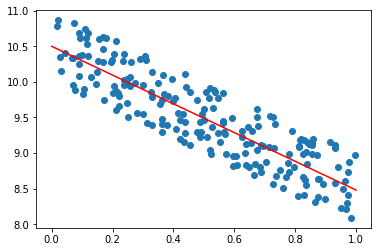

In [7]:
plt.scatter(X, y)
plt.plot(X_p_n, y_p, 'r')
plt.show()

#Logistic Regression


Binary logistic regression is basically about fitting sigmoid function to the data to separate two classes.

Standard sigmoid funciton:
sigmoid(z) = 1 / (1 + e^(-z))

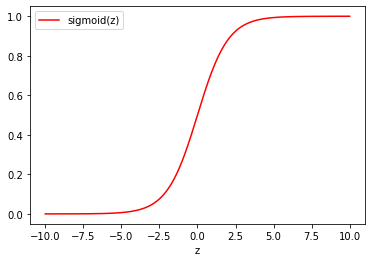

In [8]:
X = np.linspace(-10, 10, 1000)
y = []
for x in X:
  y.append(1/(1 + np.exp(-x)))
plt.plot(X, y, label='sigmoid(z)', color='r')
plt.xlabel('z')
plt.legend()
plt.show()

Creating dataset. French and english bulldogs according to body weight.

In [16]:
n_train_X = 1000
X = np.linspace(5, 25, n_train_X)
y = []

for x in X:
  if x < 14:
    y.append(0)
  elif x > 17:
    y.append(1)
  else:
    if np.random.randint(0, 2):
      y.append(1)
    else:
      y.append(0)

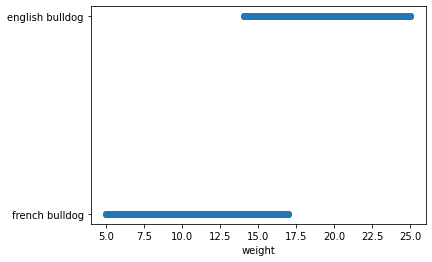

In [18]:
plt.scatter(X, y)
plt.xlabel('weight')
plt.yticks([0, 1], ['french bulldog', 'english bulldog'])
plt.show()

Creating Logistic Regression Class

In [70]:
class LogisticRegression:

  def __init__(self, lr=0.001, epochs=100):

    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.history = None

  def fit(self, _X, _y):
    # X is ndarray of shape n_samples x n_features
    n_samples, n_features = _X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    self.history = {'loss': []}

    for _ in range(self.epochs):
      z = _X @ self.weights + self.bias
      y_pred = self._sigmoid(z)

      self.history['loss'].append(self._loss(_y, y_pred))

      dw = (1 / n_samples) * _X.T @ (y_pred - _y)
      db = (1 / n_samples) * np.sum(y_pred - _y)
      
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

    return self.history
  
  def predict(self, _X):
    if any(self.weights) == None:
      raise "model has not weights, call fit() before calling predict()"
    z = _X @ self.weights + self.bias
    pred = self._sigmoid(z)
    return np.where(pred < 0.5, 0, 1), pred

  @staticmethod
  def _loss(y_true, y_pred):
    return np.sum(-(y_true*np.log(y_pred) + (1 - y_pred)*np.log(1 - y_pred)))/len(y_true)

  @staticmethod
  def _sigmoid(z):
    return 1 / (1 + np.exp(-z))

Fitting the model

In [20]:
X_n = np.c_[np.ones((n_train_X, 1)), X]


In [92]:
LR = LogisticRegression(lr=0.01, epochs=10000)
history = LR.fit(X_n, y)

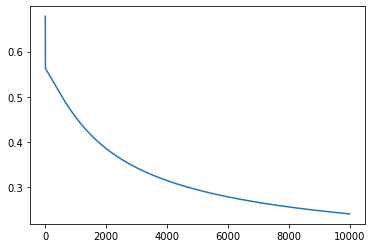

In [93]:
plt.plot([i for i in range(len(history['loss']))], history['loss'])
plt.show()

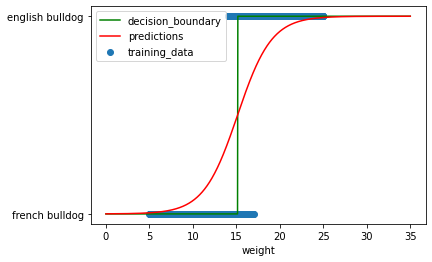

In [94]:
test_weights = np.linspace(0, 35, 1000)
test_weights_n = np.c_[np.ones((1000, 1)), test_weights]
pred_cls , pred = LR.predict(test_weights_n)
plt.scatter(X, y, label='training_data')
plt.xlabel('weight')
plt.yticks([0, 1], ['french bulldog', 'english bulldog'])
plt.plot(test_weights, pred_cls, 'g', label='decision_boundary')
plt.plot(test_weights, pred, 'r', label='predictions')
plt.legend()
plt.show()

Evaluating the model

In [95]:
test_X = np.linspace(0, 35, 1000)
test_y = []

for x in test_X:
  if x < 14:
    test_y.append(0)
  elif x > 17:
    test_y.append(1)
  else:
    if np.random.randint(0, 2):
      test_y.append(1)
    else:
      test_y.append(0)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [97]:
test_X_n = np.c_[np.ones((1000, 1)), test_X]
pred_y , _ = LR.predict(test_X_n)
print('acc: ', accuracy_score(test_y, pred_y))
print('precision: ', precision_score(test_y, pred_y))
print('recall: ', recall_score(test_y, pred_y))
print('f1: ', f1_score(test_y, pred_y))

acc:  0.953
precision:  0.9488536155202821
recall:  0.9676258992805755
f1:  0.9581478183437221


In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

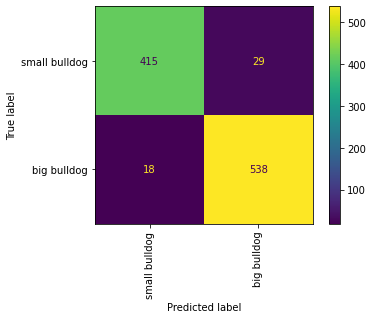

In [99]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(cm, display_labels=['small bulldog', 'big bulldog'])
disp.plot(xticks_rotation='vertical')